# Fire Prediction Neural Network Model

## This script defines a neural network model using Keras for predicting forest fire outbreaks based on environmental factors.
## The model is trained on a dataset containing temperature, relative humidity, CO concentration, and fire class labels.

## Author: Ashley Kanyatte


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import load_model

In [132]:
raw_data = pd.read_csv("C:/Users/kan_a/OneDrive/Documents/Capstone/Dataset/forest_fire.csv")

In [133]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp           999 non-null    float64
 1   rH             999 non-null    float64
 2   smoke(ppm)     999 non-null    float64
 3   density_index  999 non-null    int64  
 4   class          999 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB


In [134]:
data = raw_data.replace(['No fire', 'Fire'], [0,1])
data.drop(columns=['density_index'], inplace=True)
data.head()

C:\Users\kan_a\AppData\Local\Temp\ipykernel_30616\2349601494.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = raw_data.replace(['No fire', 'Fire'], [0,1])


,temp,rH,smoke(ppm),class
0,20.19,47.730,0.0,0
1,20.19,47.214,0.0,0
2,20.20,45.215,0.0,0
3,20.20,44.904,0.0,0
4,20.20,44.568,0.0,0


In [135]:
data.shape

(999, 4)

In [136]:
# include all rows of data in X and only columns 2-12
X = data.iloc[:,0:3]
# set Y, the target, to the last column for classification
Y = data.iloc[:,3]

In [137]:
#X.info()
#Y.info()

In [138]:
from keras.models import Sequential
from keras.layers import Dense

In [139]:
#create model 
model = Sequential()
#first layer
model.add(Dense(3, input_dim = 3, activation = 'relu'))
#second layer
model.add(Dense(30,  activation = 'relu'))
#3rd layer
model.add(Dense(20,  activation = 'relu'))
#4th layer
model.add(Dense(1,  activation = 'sigmoid'))

c:\Users\kan_a\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
#compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 30)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 773 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
#fit model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5922 - loss: 1.2769 - val_accuracy: 0.4758 - val_loss: 1.2608
Epoch 2/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0814 - val_accuracy: 0.5030 - val_loss: 1.3517
Epoch 3/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0619 - val_accuracy: 0.4727 - val_loss: 1.7338
Epoch 4/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.4606 - val_loss: 2.6113
Epoch 5/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0611 - val_accuracy: 0.4879 - val_loss: 2.3344
Epoch 6/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0488 - val_accuracy: 0.4333 - val_loss: 4.0365
Epoch 7/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0545 - val_accuracy: 0.5667 - val_loss: 1.8030
Epoch 8/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0476 - val_accuracy: 0.6667 - val_loss: 1.2

In [143]:
#evaluate model performance
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9728 - loss: 0.0924      
compile_metrics: 92.19%


In [144]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<function matplotlib.pyplot.show(close=None, block=None)>

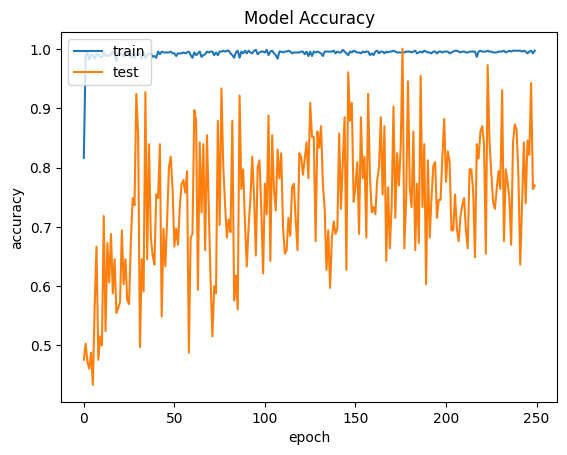

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

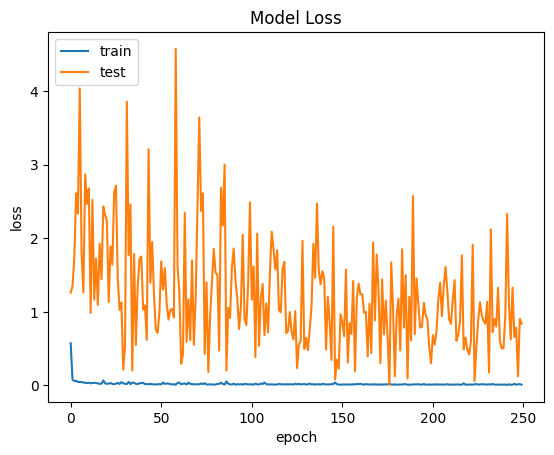

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [147]:
model.save('fire_pred.h5')